#  Load the Iris Dataset

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [12]:
missing_values = data.isnull().sum()
print(missing_values)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [9]:
data = pd.read_csv("IRIS.csv")
data.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# data cleaning

In [14]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

     sepal_length  sepal_width  petal_length  petal_width         species
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
142           5.8          2.7           5.1          1.9  Iris-virginica


In [17]:
data = data.drop_duplicates()


# Data Exploration (EDA)

In [21]:
# Summary statistics
summary_stats = data.describe()
print(summary_stats)


       sepal_length  sepal_width  petal_length  petal_width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


# Data Visualization

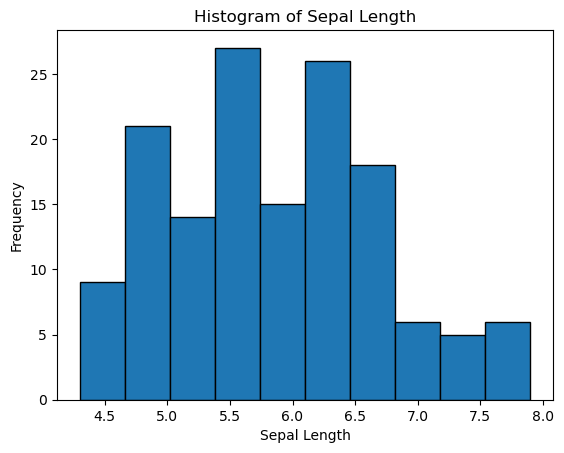

In [22]:
import matplotlib.pyplot as plt
plt.hist(data['sepal_length'], bins=10, edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.show()


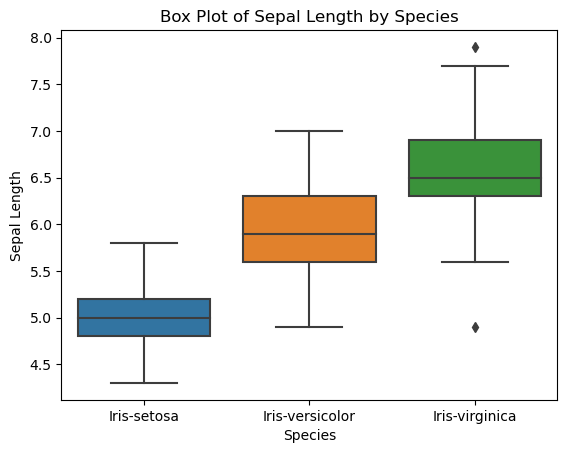

In [23]:
import seaborn as sns
sns.boxplot(x='species', y='sepal_length', data=data)
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.title('Box Plot of Sepal Length by Species')
plt.show()


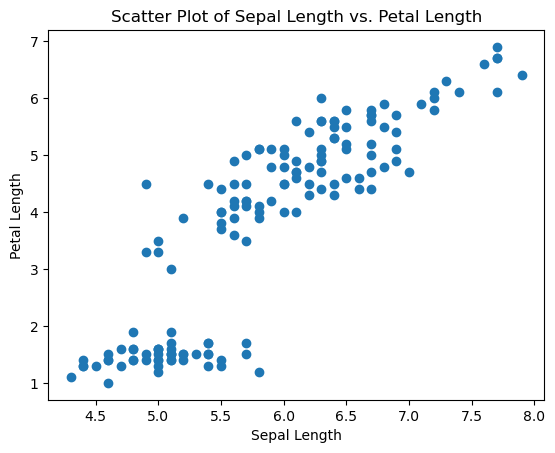

In [24]:
plt.scatter(data['sepal_length'], data['petal_length'])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Scatter Plot of Sepal Length vs. Petal Length')
plt.show()


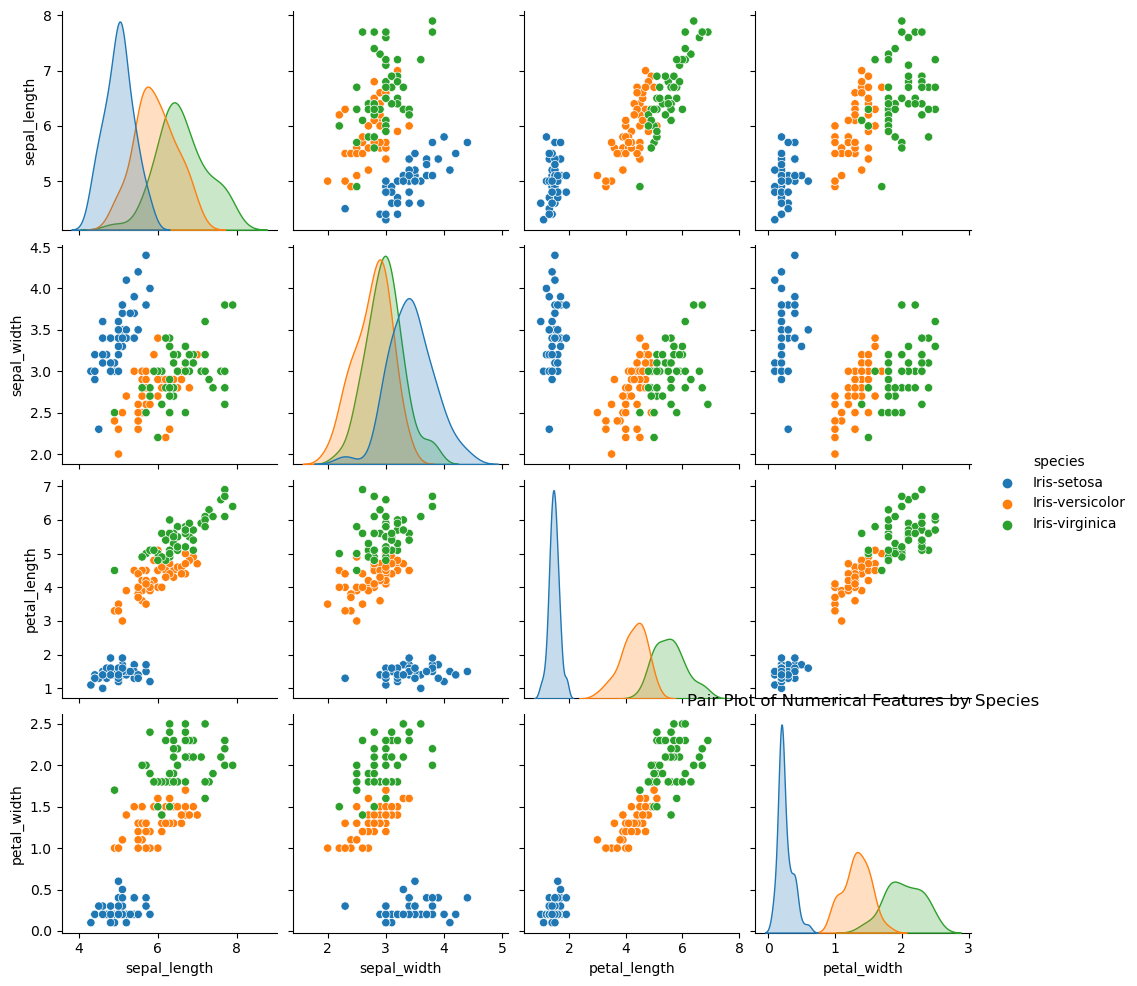

In [26]:

sns.pairplot(data, hue='species')
plt.title('Pair Plot of Numerical Features by Species')
plt.show()


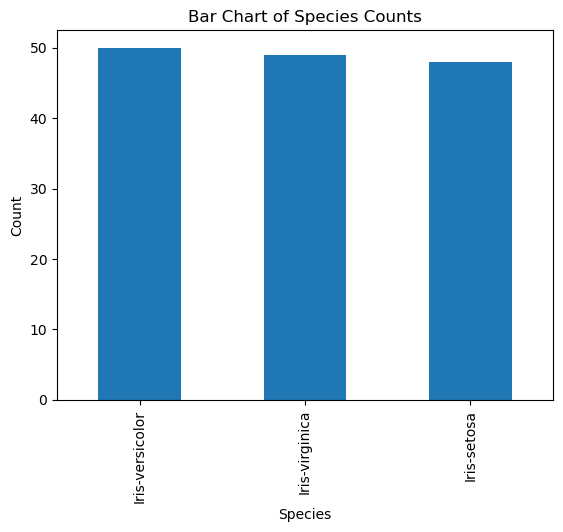

In [27]:
data['species'].value_counts().plot(kind='bar')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Bar Chart of Species Counts')
plt.show()


C:\Users\ASUS 1\AppData\Local\Temp\ipykernel_9960\2084616580.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


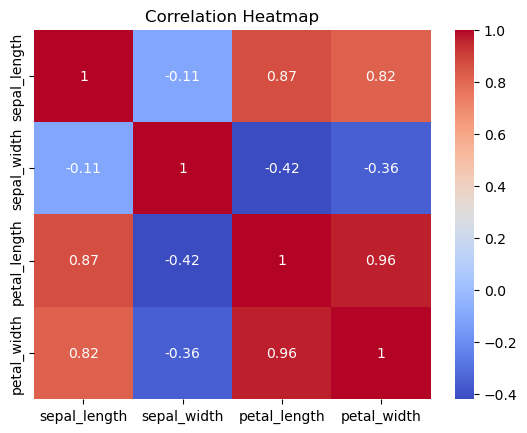

In [28]:
import seaborn as sns
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# building a classification model for the Iris dataset


In [11]:

# Split the data into features (X) and the target variable (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into a training set and a test set (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train your classifier (e.g., DecisionTreeClassifier)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Create a new DataFrame for the test data
test_data = X_test.copy()
test_data['species'] = y_test  # Add the actual species labels

# Add the predicted labels to the test data DataFrame
test_data['predicted_species'] = y_pred

# Concatenate the test data with the original data
combined_data = pd.concat([data, test_data], ignore_index=True)


# Print the predicted labels
print("Predicted labels:")
print(y_pred)



Predicted labels:
['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [12]:
# Create a new DataFrame for the test data
test_data = X_test.copy()
test_data['species'] = y_test  # Add the actual species labels

# Add the predicted labels to the test data DataFrame
test_data['predicted_species'] = y_pred

# Now 'test_data' contains both the actual and predicted species labels
# You can print 'test_data' to see the actual and predicted labels side by side
print(test_data)


     sepal_length  sepal_width  petal_length  petal_width          species  \
73            6.1          2.8           4.7          1.2  Iris-versicolor   
18            5.7          3.8           1.7          0.3      Iris-setosa   
118           7.7          2.6           6.9          2.3   Iris-virginica   
78            6.0          2.9           4.5          1.5  Iris-versicolor   
76            6.8          2.8           4.8          1.4  Iris-versicolor   
31            5.4          3.4           1.5          0.4      Iris-setosa   
64            5.6          2.9           3.6          1.3  Iris-versicolor   
141           6.9          3.1           5.1          2.3   Iris-virginica   
68            6.2          2.2           4.5          1.5  Iris-versicolor   
82            5.8          2.7           3.9          1.2  Iris-versicolor   
110           6.5          3.2           5.1          2.0   Iris-virginica   
12            4.8          3.0           1.4          0.1      I

In [13]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Model Evaluation and Tuning

In [19]:

from sklearn.model_selection import GridSearchCV

# Create a list of classifiers to try
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Perform hyperparameter tuning for each classifier using GridSearchCV
tuned_classifiers = {}
for name, clf in classifiers.items():
    params = {}  # Define hyperparameters to search
    if name == 'Decision Tree':
        params = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 15]}
    elif name == 'Random Forest':
        params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
    elif name == 'SVM':
        params = {'C': [1, 10, 100], 'kernel': ['linear', 'rbf']}
    elif name == 'K-Nearest Neighbors':
        params = {'n_neighbors': [3, 5, 7, 9]}

    grid_search = GridSearchCV(clf, param_grid=params, cv=5)
    grid_search.fit(X_train, y_train)
    tuned_classifiers[name] = grid_search.best_estimator_

# Evaluate the tuned classifiers
results = {}
for name, clf in tuned_classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print the results
print("Model Accuracy After Tuning:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.2f}")


Model Accuracy After Tuning:
Decision Tree: 1.00
Random Forest: 1.00
SVM: 1.00
K-Nearest Neighbors: 1.00


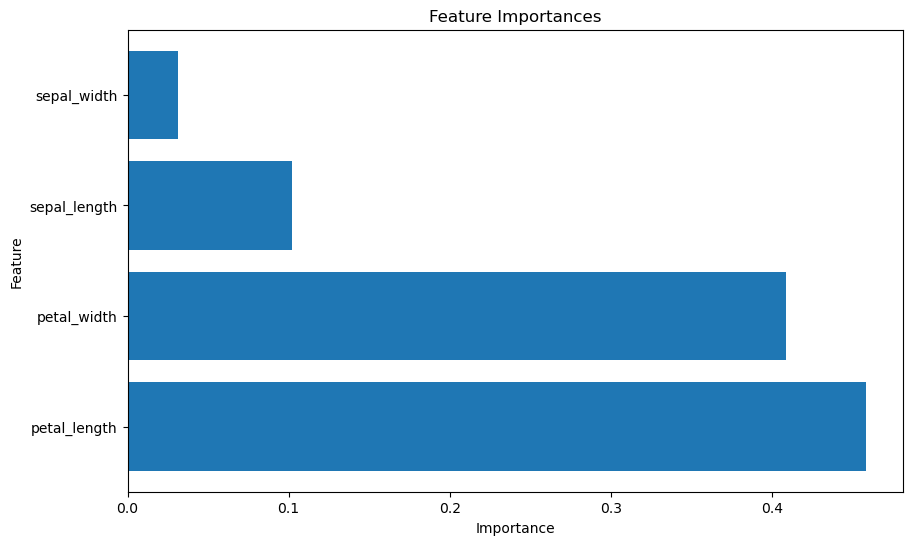

In [16]:
best_classifier = tuned_classifiers['Random Forest']

# Get feature importances
feature_importances = best_classifier.feature_importances_

# Match feature importances to feature names
feature_names = X.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [17]:
print(data.columns)


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [22]:

# Create a Series from y_pred
predicted_labels = pd.Series(y_pred)

# Add the 'predicted_species' column to your DataFrame
data['predicted_species'] = predicted_labels

# Verify that the column has been added correctly
print(data.head())



   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

  predicted_species  
0   Iris-versicolor  
1       Iris-setosa  
2    Iris-virginica  
3   Iris-versicolor  
4   Iris-versicolor  


In [78]:
# Save the DataFrame to a CSV file
data.to_csv('predicted_species.csv', index=False)


In [79]:
import os

file_path = 'predicted_species.csv'  # Replace with your file path
if os.path.isfile(file_path):
    print("File exists.")
else:
    print("File does not exist.")


File exists.


In [34]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv("IRIS.csv")

# Split the data into features (X) and the target variable (y)
X = data.drop('species', axis=1)
y = data['species']

# Encode the target variable 'y' into numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create and train your classifier (e.g., DecisionTreeClassifier) using encoded labels
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y_encoded)

# Make predictions on the entire dataset
y_pred_encoded = clf.predict(X)

# Decode the encoded labels back to their original values
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Create a new DataFrame for the predicted labels
predicted_data = data.copy()
predicted_data['predicted_species'] = y_pred

# Print the predicted labels
print("Predicted labels:")
print(y_pred)


Predicted labels:
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [37]:
print(len(data))
print(len(test_data))


150
30


In [38]:
combined_data = pd.concat([data, test_data], ignore_index=True)


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming you have a DataFrame 'data' with your original dataset
# Randomly select 30 rows for testing
test_data = data.sample(n=30, random_state=42)

# The remaining data (120 rows) will be used for training
train_data = data.drop(test_data.index)

# Split the training data into features (X_train) and the target variable (y_train)
X_train = train_data.drop('species', axis=1)
y_train = train_data['species']

# Split the test data into features (X_test) and the target variable (y_test)
X_test = test_data.drop('species', axis=1)
y_test = test_data['species']

# Create and train your classifier (e.g., DecisionTreeClassifier)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Create a new DataFrame for the test data
test_data['predicted_species'] = y_pred

# Concatenate the test data with the original data
combined_data = pd.concat([data, test_data], ignore_index=True)

# Print the predicted labels
print("Predicted labels:")
print(y_pred)


Predicted labels:
['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [40]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [71]:
import pandas as pd

# Assuming you have a DataFrame named 'combined_data'
# Export the DataFrame to an Excel file
combined_data("output.xlsx", index=False)



TypeError: 'DataFrame' object is not callable

In [64]:
import pandas as pd

# Load your original DataFrame
original_data = pd.read_csv("IRIS.csv")

# Load the Excel file you exported
combined_data.to_excel = pd.read_excel("output.xlsx")

# Check if both DataFrames are identical
if original_data.equals(exported_data):
    print("The DataFrames are identical. Export was successful.")
else:
    print("The DataFrames are not identical. Export may have issues.")


The DataFrames are not identical. Export may have issues.


In [68]:
import pandas as pd

# Load your original DataFrame (replace 'your_original_data.csv' with your file path)
data = pd.read_csv("Iris.csv", encoding='latin-1')

# Load the exported DataFrame (replace 'exported_data.csv' with your file path)
combined_data.to_excel = pd.read_csv('output.xlsx')

# Check if the columns are the same
columns_equal = original_data.columns.equals(exported_data.columns)

# Check if the data values are the same (ignoring NaN values)
data_equal = original_data.equals(exported_data)

# Check for specific differences in data values
differences = original_data.compare(exported_data)

# Print the results
print("Columns are the same:", columns_equal)
print("Data is the same:", data_equal)
print("Differences in data values:")
print(differences)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9f in position 11: invalid start byte

In [72]:
data.head(149)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica


In [73]:
import pandas as pd

# Assuming you have a DataFrame named 'combined_data'
# Iterate through each row and print it
for index, row in combined_data.iterrows():
    print(row)


sepal_length                 5.1
sepal_width                  3.5
petal_length                 1.4
petal_width                  0.2
species              Iris-setosa
predicted_species            NaN
Name: 0, dtype: object
sepal_length                 4.9
sepal_width                  3.0
petal_length                 1.4
petal_width                  0.2
species              Iris-setosa
predicted_species            NaN
Name: 1, dtype: object
sepal_length                 4.7
sepal_width                  3.2
petal_length                 1.3
petal_width                  0.2
species              Iris-setosa
predicted_species            NaN
Name: 2, dtype: object
sepal_length                 4.6
sepal_width                  3.1
petal_length                 1.5
petal_width                  0.2
species              Iris-setosa
predicted_species            NaN
Name: 3, dtype: object
sepal_length                 5.0
sepal_width                  3.6
petal_length                 1.4
petal_width      

In [74]:
import pandas as pd

# Assuming you have a DataFrame named 'data'
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

# Display the entire DataFrame
data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [75]:
import pandas as pd

# Assuming you have a DataFrame named 'data' containing your entire dataset
data.to_excel("iris_dataset.xlsx", index=False)


In [77]:
import pandas as pd

# Assuming you have a DataFrame named 'data' with a 'predicted_species' column
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

# Display only the rows where 'predicted_species' is not NaN
data[data['predicted_label'].notna()]


KeyError: 'predicted_label'

In [78]:
import pandas as pd

# Assuming you have your original dataset in 'data' and predictions in 'test_data'
# Concatenate the 'test_data' DataFrame with the 'data' DataFrame using the index as the key
combined_data = pd.concat([data, test_data['predicted_species']], axis=1)

# Display the entire DataFrame
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
print(combined_data)


     sepal_length  sepal_width  petal_length  petal_width          species  \
0             5.1          3.5           1.4          0.2      Iris-setosa   
1             4.9          3.0           1.4          0.2      Iris-setosa   
2             4.7          3.2           1.3          0.2      Iris-setosa   
3             4.6          3.1           1.5          0.2      Iris-setosa   
4             5.0          3.6           1.4          0.2      Iris-setosa   
5             5.4          3.9           1.7          0.4      Iris-setosa   
6             4.6          3.4           1.4          0.3      Iris-setosa   
7             5.0          3.4           1.5          0.2      Iris-setosa   
8             4.4          2.9           1.4          0.2      Iris-setosa   
9             4.9          3.1           1.5          0.1      Iris-setosa   
10            5.4          3.7           1.5          0.2      Iris-setosa   
11            4.8          3.4           1.6          0.2      I

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming you have a DataFrame 'data' with your original dataset

# Split the data into features (X) and the target variable (y)
X = data.drop('species', axis=1)
y = data['species']

# Create and train your classifier (e.g., DecisionTreeClassifier)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Make predictions on the entire dataset
y_pred = clf.predict(X)

# Add the predicted labels to the original dataset
data['predicted_species'] = y_pred

# Display the entire DataFrame
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
print(data)


     sepal_length  sepal_width  petal_length  petal_width          species  \
0             5.1          3.5           1.4          0.2      Iris-setosa   
1             4.9          3.0           1.4          0.2      Iris-setosa   
2             4.7          3.2           1.3          0.2      Iris-setosa   
3             4.6          3.1           1.5          0.2      Iris-setosa   
4             5.0          3.6           1.4          0.2      Iris-setosa   
5             5.4          3.9           1.7          0.4      Iris-setosa   
6             4.6          3.4           1.4          0.3      Iris-setosa   
7             5.0          3.4           1.5          0.2      Iris-setosa   
8             4.4          2.9           1.4          0.2      Iris-setosa   
9             4.9          3.1           1.5          0.1      Iris-setosa   
10            5.4          3.7           1.5          0.2      Iris-setosa   
11            4.8          3.4           1.6          0.2      I

In [80]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a classification report with additional metrics
report = classification_report(y_test, y_pred)
print(report)

ValueError: Found input variables with inconsistent numbers of samples: [30, 150]

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a DataFrame 'data' with your original dataset

# Split the data into features (X) and the target variable (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into a training set and a test set (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train your classifier (e.g., DecisionTreeClassifier)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a classification report with additional metrics
report = classification_report(y_test, y_pred)
print(report)


ValueError: could not convert string to float: 'Iris-setosa'

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder



# Encode the target variable 'species' into numerical labels
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])

# Split the data into features (X) and the target variable (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into a training set and a test set (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train your classifier (e.g., DecisionTreeClassifier)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a classification report with additional metrics
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)


ValueError: could not convert string to float: 'Iris-setosa'

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming you have a DataFrame 'data' with your original dataset

# Split the data into features (X) and the target variable (y)
X = data.drop('species', axis=1)
y = data['species']

# Split the data into a training set and a test set (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train your classifier (e.g., DecisionTreeClassifier)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Add the predicted labels to the test data DataFrame
test_data = X_test.copy()
test_data['predicted_species'] = y_pred

# Display the entire test data DataFrame with predictions
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
print(test_data)


ValueError: could not convert string to float: 'Iris-setosa'

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame 'data' with your original dataset

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the target variable 'species' into numeric labels
data['species_encoded'] = label_encoder.fit_transform(data['species'])

# Split the data into features (X) and the encoded target variable (y)
X = data.drop(['species', 'species_encoded'], axis=1)
y = data['species_encoded']

# Split the data into a training set and a test set (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train your classifier (e.g., DecisionTreeClassifier)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Add the predicted labels to the test data DataFrame
test_data = X_test.copy()
test_data['predicted_species_encoded'] = y_pred

# Decode the predicted labels back to their original string values
test_data['predicted_species'] = label_encoder.inverse_transform(test_data['predicted_species_encoded'])

# Display the entire test data DataFrame with predictions
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
print(test_data)


ValueError: could not convert string to float: 'Iris-setosa'

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame 'data' with your original dataset

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the target variable 'species' into numeric labels
data['species_encoded'] = label_encoder.fit_transform(data['species'])

# Split the data into features (X) and the encoded target variable (y)
X = data.drop(['species', 'species_encoded'], axis=1)
y = data['species_encoded']

# Split the data into a training set and a test set (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train your classifier (e.g., DecisionTreeClassifier)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Add the predicted labels to the test data DataFrame
test_data = X_test.copy()
test_data['predicted_species_encoded'] = y_pred

# Decode the predicted labels back to their original string values
test_data['predicted_species'] = label_encoder.inverse_transform(test_data['predicted_species_encoded'])

# Display the entire test data DataFrame with predictions
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
print(test_data)


ValueError: could not convert string to float: 'Iris-setosa'

In [87]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame 'data' with your original dataset

# Create a label encoder for the target variable 'species'
label_encoder = LabelEncoder()
data['species_encoded'] = label_encoder.fit_transform(data['species'])

# Split the data into features (X) and the target variable (y)
X = data.drop(['species', 'species_encoded'], axis=1)
y = data['species_encoded']

# Create and train your classifier (e.g., DecisionTreeClassifier)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Make predictions on the entire dataset
y_pred = clf.predict(X)

# Decode the predicted labels back to their original string values
data['predicted_species_encoded'] = y_pred
data['predicted_species'] = label_encoder.inverse_transform(y_pred)

# Display the entire DataFrame with predictions
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
print(data)


ValueError: could not convert string to float: 'Iris-setosa'

In [88]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame 'data' with your original dataset

# Create a label encoder for the target variable 'species'
label_encoder = LabelEncoder()
data['species_encoded'] = label_encoder.fit_transform(data['species'])

# Split the data into features (X) and the target variable (y)
X = data.drop(['species', 'species_encoded'], axis=1)
y = data['species_encoded']

# Create and train your classifier (e.g., DecisionTreeClassifier)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Make predictions on the entire dataset
y_pred = clf.predict(X)

# Decode the predicted labels back to their original string values
data['predicted_species_encoded'] = y_pred
data['predicted_species'] = label_encoder.inverse_transform(y_pred)

# Display the entire DataFrame with predictions
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
print(data)


ValueError: could not convert string to float: 'Iris-setosa'